# Import Libraries

In [51]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt


In [52]:
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
pd.set_option("display.max_columns",None)

In [50]:
%matplotlib inline


# Mount Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change current working directory

In [9]:
os.chdir('/content/drive/MyDrive/ironhack-spotiProject')

# Load Datasets

In [10]:
top100 = pd.read_csv('data/top100_a.csv')

In [14]:
top100.head()

,Unnamed: 0,Unnamed: 0.1,song,singer,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0,As It Was,Harry Styles,4LRPiXqCikLlN15c3yImP7,0.520,0.731,6.0,-5.338,0.0,0.0557,0.3420,0.00101,0.3110,0.662,173.930,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303.0,4.0
1,1,1,First Class,Jack Harlow,1rDQ4oMwGJI7B4tovsBOxc,0.905,0.563,8.0,-6.135,1.0,0.1020,0.0254,0.00001,0.1130,0.324,106.998,audio_features,1rDQ4oMwGJI7B4tovsBOxc,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948.0,4.0
2,2,2,Wait For U,Future Featuring Drake & Tems,59nOXPmaKlBfGMDeOVGrIK,0.463,0.642,1.0,-4.474,1.0,0.3400,0.3140,0.00000,0.0686,0.339,83.389,audio_features,59nOXPmaKlBfGMDeOVGrIK,spotify:track:59nOXPmaKlBfGMDeOVGrIK,https://api.spotify.com/v1/tracks/59nOXPmaKlBf...,https://api.spotify.com/v1/audio-analysis/59nO...,189893.0,4.0
3,3,3,Late Night Talking,Harry Styles,1qEmFfgcLObUfQm0j1W2CK,0.714,0.728,10.0,-4.595,1.0,0.0468,0.2980,0.00000,0.1060,0.901,114.996,audio_features,1qEmFfgcLObUfQm0j1W2CK,spotify:track:1qEmFfgcLObUfQm0j1W2CK,https://api.spotify.com/v1/tracks/1qEmFfgcLObU...,https://api.spotify.com/v1/audio-analysis/1qEm...,177955.0,4.0
4,4,4,About Damn Time,Lizzo,1PckUlxKqWQs3RlWXVBLw3,0.836,0.743,10.0,-6.305,0.0,0.0656,0.0995,0.00000,0.3350,0.722,108.966,audio_features,1PckUlxKqWQs3RlWXVBLw3,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822.0,4.0


In [15]:
notHot = pd.read_csv('data/not_hot_songs_a.csv')

In [16]:
notHot.head()

,Unnamed: 0,Unnamed: 0.1,singer,song,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0,Su ta gar,Abere izate ukatua,4tMbI2qkOIfc1kzsbw7X64,0.393,0.967,10.0,-5.775,0.0,0.0511,0.000010,0.0013,0.147,0.469,98.016,audio_features,4tMbI2qkOIfc1kzsbw7X64,spotify:track:4tMbI2qkOIfc1kzsbw7X64,https://api.spotify.com/v1/tracks/4tMbI2qkOIfc...,https://api.spotify.com/v1/audio-analysis/4tMb...,243973.0,4.0
1,1,1,Spice Girls,Viva Forever (Tony Rich Remix Instrumental),1dehm5fgmBVxxur0YnZLMq,0.809,0.478,10.0,-7.371,0.0,0.1870,0.010600,0.8610,0.125,0.594,168.897,audio_features,1dehm5fgmBVxxur0YnZLMq,spotify:track:1dehm5fgmBVxxur0YnZLMq,https://api.spotify.com/v1/tracks/1dehm5fgmBVx...,https://api.spotify.com/v1/audio-analysis/1deh...,342733.0,4.0
2,2,2,Dandy Livingstone,Think About That,5vWscUwJJSsIvKR0YJa8cV,0.759,0.654,0.0,-8.462,1.0,0.0523,0.134000,0.2340,0.113,0.664,95.544,audio_features,5vWscUwJJSsIvKR0YJa8cV,spotify:track:5vWscUwJJSsIvKR0YJa8cV,https://api.spotify.com/v1/tracks/5vWscUwJJSsI...,https://api.spotify.com/v1/audio-analysis/5vWs...,172947.0,4.0
3,3,3,Orquesta Harlow,That Groovy Shingaling,2kTZKa7J0ykBpmzs5TMjWT,0.454,0.481,10.0,-10.895,1.0,0.0318,0.708000,0.2540,0.158,0.757,122.281,audio_features,2kTZKa7J0ykBpmzs5TMjWT,spotify:track:2kTZKa7J0ykBpmzs5TMjWT,https://api.spotify.com/v1/tracks/2kTZKa7J0ykB...,https://api.spotify.com/v1/audio-analysis/2kTZ...,135187.0,4.0
4,4,4,King B.A.V.,Take It Off,77ihANWN9MuLGim3ZtYIti,0.706,0.580,7.0,-3.692,0.0,0.0423,0.000473,0.0000,0.256,0.115,75.102,audio_features,77ihANWN9MuLGim3ZtYIti,spotify:track:77ihANWN9MuLGim3ZtYIti,https://api.spotify.com/v1/tracks/77ihANWN9MuL...,https://api.spotify.com/v1/audio-analysis/77ih...,244827.0,4.0


In [21]:
top100.type.value_counts(dropna=False)

audio_features    99
NaN                1
Name: type, dtype: int64

In [23]:
notHot.type.value_counts(dropna=False)

audio_features    3581
NaN               1419
Name: type, dtype: int64

# Data Cleaning

## Treat NaN

In [24]:
top100.isna().sum()

Unnamed: 0          0
Unnamed: 0.1        0
song                0
singer              0
id                  1
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
type                1
id.1                1
uri                 1
track_href          1
analysis_url        1
duration_ms         1
time_signature      1
dtype: int64

In [25]:
top100[top100.id.isna()]

,Unnamed: 0,Unnamed: 0.1,song,singer,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature
82,82,82,I'm On One,Future Featuring Drake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
top100.dropna(inplace=True)

In [29]:
top100.isna().sum()

Unnamed: 0          0
Unnamed: 0.1        0
song                0
singer              0
id                  0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id.1                0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [30]:
notHot.isna().sum()

Unnamed: 0             0
Unnamed: 0.1           0
singer                 0
song                   0
id                  1417
danceability        1419
energy              1419
key                 1419
loudness            1419
mode                1419
speechiness         1419
acousticness        1419
instrumentalness    1419
liveness            1419
valence             1419
tempo               1419
type                1419
id.1                1419
uri                 1419
track_href          1419
analysis_url        1419
duration_ms         1419
time_signature      1419
dtype: int64

In [31]:
notHot[notHot.energy.isna()]

,Unnamed: 0,Unnamed: 0.1,singer,song,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature
6,6,6,Leatherface and Hot Water Music,Take It As It Comes (Hot Water Music),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,7,Harry Chapin,Country Dreams (LP Version),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10,10,Patrick Nuo,I Can't Tell - Album Version,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,11,11,Mormon Tabernacle Choir,Hear My Supplication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,16,16,Bauhaus,Hollow Hills (re-mastered),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,4981,4981,Roscoe Robinson,Darling_ Please Tell Me - Original,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4986,4986,4986,Dead Prez & The Evil Genius DJ Green Lantern,Helpful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4987,4987,4987,Five Special,Jam (LP Version),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4989,4989,4989,Sepultura,Inner Self (Live Under A Pale Grey Sky) (Album...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
notHot.dropna(inplace=True)

In [33]:
notHot.isna().sum()

Unnamed: 0          0
Unnamed: 0.1        0
singer              0
song                0
id                  0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id.1                0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [34]:
top100.shape

(99, 23)

In [35]:
notHot.shape

(3581, 23)

# Preprocessing

Add Hot feature and concat

In [36]:
top100['hot'] = 'Yes'

In [38]:
top100.head()

,Unnamed: 0,Unnamed: 0.1,song,singer,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,hot
0,0,0,As It Was,Harry Styles,4LRPiXqCikLlN15c3yImP7,0.520,0.731,6.0,-5.338,0.0,0.0557,0.3420,0.00101,0.3110,0.662,173.930,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303.0,4.0,Yes
1,1,1,First Class,Jack Harlow,1rDQ4oMwGJI7B4tovsBOxc,0.905,0.563,8.0,-6.135,1.0,0.1020,0.0254,0.00001,0.1130,0.324,106.998,audio_features,1rDQ4oMwGJI7B4tovsBOxc,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948.0,4.0,Yes
2,2,2,Wait For U,Future Featuring Drake & Tems,59nOXPmaKlBfGMDeOVGrIK,0.463,0.642,1.0,-4.474,1.0,0.3400,0.3140,0.00000,0.0686,0.339,83.389,audio_features,59nOXPmaKlBfGMDeOVGrIK,spotify:track:59nOXPmaKlBfGMDeOVGrIK,https://api.spotify.com/v1/tracks/59nOXPmaKlBf...,https://api.spotify.com/v1/audio-analysis/59nO...,189893.0,4.0,Yes
3,3,3,Late Night Talking,Harry Styles,1qEmFfgcLObUfQm0j1W2CK,0.714,0.728,10.0,-4.595,1.0,0.0468,0.2980,0.00000,0.1060,0.901,114.996,audio_features,1qEmFfgcLObUfQm0j1W2CK,spotify:track:1qEmFfgcLObUfQm0j1W2CK,https://api.spotify.com/v1/tracks/1qEmFfgcLObU...,https://api.spotify.com/v1/audio-analysis/1qEm...,177955.0,4.0,Yes
4,4,4,About Damn Time,Lizzo,1PckUlxKqWQs3RlWXVBLw3,0.836,0.743,10.0,-6.305,0.0,0.0656,0.0995,0.00000,0.3350,0.722,108.966,audio_features,1PckUlxKqWQs3RlWXVBLw3,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822.0,4.0,Yes


In [39]:
notHot['hot'] = 'No'

In [40]:
notHot.head()

,Unnamed: 0,Unnamed: 0.1,singer,song,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,hot
0,0,0,Su ta gar,Abere izate ukatua,4tMbI2qkOIfc1kzsbw7X64,0.393,0.967,10.0,-5.775,0.0,0.0511,0.000010,0.0013,0.147,0.469,98.016,audio_features,4tMbI2qkOIfc1kzsbw7X64,spotify:track:4tMbI2qkOIfc1kzsbw7X64,https://api.spotify.com/v1/tracks/4tMbI2qkOIfc...,https://api.spotify.com/v1/audio-analysis/4tMb...,243973.0,4.0,No
1,1,1,Spice Girls,Viva Forever (Tony Rich Remix Instrumental),1dehm5fgmBVxxur0YnZLMq,0.809,0.478,10.0,-7.371,0.0,0.1870,0.010600,0.8610,0.125,0.594,168.897,audio_features,1dehm5fgmBVxxur0YnZLMq,spotify:track:1dehm5fgmBVxxur0YnZLMq,https://api.spotify.com/v1/tracks/1dehm5fgmBVx...,https://api.spotify.com/v1/audio-analysis/1deh...,342733.0,4.0,No
2,2,2,Dandy Livingstone,Think About That,5vWscUwJJSsIvKR0YJa8cV,0.759,0.654,0.0,-8.462,1.0,0.0523,0.134000,0.2340,0.113,0.664,95.544,audio_features,5vWscUwJJSsIvKR0YJa8cV,spotify:track:5vWscUwJJSsIvKR0YJa8cV,https://api.spotify.com/v1/tracks/5vWscUwJJSsI...,https://api.spotify.com/v1/audio-analysis/5vWs...,172947.0,4.0,No
3,3,3,Orquesta Harlow,That Groovy Shingaling,2kTZKa7J0ykBpmzs5TMjWT,0.454,0.481,10.0,-10.895,1.0,0.0318,0.708000,0.2540,0.158,0.757,122.281,audio_features,2kTZKa7J0ykBpmzs5TMjWT,spotify:track:2kTZKa7J0ykBpmzs5TMjWT,https://api.spotify.com/v1/tracks/2kTZKa7J0ykB...,https://api.spotify.com/v1/audio-analysis/2kTZ...,135187.0,4.0,No
4,4,4,King B.A.V.,Take It Off,77ihANWN9MuLGim3ZtYIti,0.706,0.580,7.0,-3.692,0.0,0.0423,0.000473,0.0000,0.256,0.115,75.102,audio_features,77ihANWN9MuLGim3ZtYIti,spotify:track:77ihANWN9MuLGim3ZtYIti,https://api.spotify.com/v1/tracks/77ihANWN9MuL...,https://api.spotify.com/v1/audio-analysis/77ih...,244827.0,4.0,No


In [ ]:
# Concat

In [41]:
full = pd.concat([top100,notHot], axis=0)

In [42]:
full.head()

,Unnamed: 0,Unnamed: 0.1,song,singer,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,hot
0,0,0,As It Was,Harry Styles,4LRPiXqCikLlN15c3yImP7,0.520,0.731,6.0,-5.338,0.0,0.0557,0.3420,0.00101,0.3110,0.662,173.930,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303.0,4.0,Yes
1,1,1,First Class,Jack Harlow,1rDQ4oMwGJI7B4tovsBOxc,0.905,0.563,8.0,-6.135,1.0,0.1020,0.0254,0.00001,0.1130,0.324,106.998,audio_features,1rDQ4oMwGJI7B4tovsBOxc,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948.0,4.0,Yes
2,2,2,Wait For U,Future Featuring Drake & Tems,59nOXPmaKlBfGMDeOVGrIK,0.463,0.642,1.0,-4.474,1.0,0.3400,0.3140,0.00000,0.0686,0.339,83.389,audio_features,59nOXPmaKlBfGMDeOVGrIK,spotify:track:59nOXPmaKlBfGMDeOVGrIK,https://api.spotify.com/v1/tracks/59nOXPmaKlBf...,https://api.spotify.com/v1/audio-analysis/59nO...,189893.0,4.0,Yes
3,3,3,Late Night Talking,Harry Styles,1qEmFfgcLObUfQm0j1W2CK,0.714,0.728,10.0,-4.595,1.0,0.0468,0.2980,0.00000,0.1060,0.901,114.996,audio_features,1qEmFfgcLObUfQm0j1W2CK,spotify:track:1qEmFfgcLObUfQm0j1W2CK,https://api.spotify.com/v1/tracks/1qEmFfgcLObU...,https://api.spotify.com/v1/audio-analysis/1qEm...,177955.0,4.0,Yes
4,4,4,About Damn Time,Lizzo,1PckUlxKqWQs3RlWXVBLw3,0.836,0.743,10.0,-6.305,0.0,0.0656,0.0995,0.00000,0.3350,0.722,108.966,audio_features,1PckUlxKqWQs3RlWXVBLw3,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822.0,4.0,Yes


In [43]:
full.shape

(3680, 24)

In [44]:
full.isna().sum()

Unnamed: 0          0
Unnamed: 0.1        0
song                0
singer              0
id                  0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id.1                0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
hot                 0
dtype: int64

# KMeans Clustering

## Split and scale features to use for clustering

In [45]:
full.describe()

,Unnamed: 0,Unnamed: 0.1,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3.680000e+03,3680.000000
mean,2398.453261,2398.453261,0.547317,0.621546,5.331522,-9.468111,0.664130,0.087305,0.313840,0.216272,0.212175,0.511927,120.864679,2.454312e+05,3.896739
std,1475.569266,1475.569266,0.177059,0.253081,3.551567,4.751126,0.472358,0.114462,0.339083,0.340045,0.189216,0.264621,28.923089,1.101308e+05,0.454736
min,0.000000,0.000000,0.000000,0.000020,0.000000,-41.778000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.240000e+03,0.000000
25%,1111.750000,1111.750000,0.424000,0.434750,2.000000,-11.739500,0.000000,0.034975,0.011600,0.000002,0.095000,0.299000,99.416500,1.801385e+05,4.000000
50%,2378.500000,2378.500000,0.558000,0.658000,5.000000,-8.577000,1.000000,0.046600,0.160000,0.001215,0.130000,0.517000,120.692500,2.273065e+05,4.000000
75%,3669.500000,3669.500000,0.676000,0.839000,9.000000,-6.112250,1.000000,0.081300,0.601000,0.389500,0.276250,0.726000,137.912250,2.865800e+05,4.000000
max,4998.000000,4998.000000,0.983000,1.000000,11.000000,0.289000,1.000000,0.948000,0.996000,0.989000,0.987000,0.989000,216.808000,1.539667e+06,5.000000


In [47]:
# danceability : tempo, duration_ms
X = pd.concat([full.loc[:,'danceability':'tempo'],full.duration_ms],axis=1)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.520,0.731,6.0,-5.338,0.0,0.0557,0.342000,0.001010,0.3110,0.662,173.930,167303.0
1,0.905,0.563,8.0,-6.135,1.0,0.1020,0.025400,0.000010,0.1130,0.324,106.998,173948.0
2,0.463,0.642,1.0,-4.474,1.0,0.3400,0.314000,0.000000,0.0686,0.339,83.389,189893.0
3,0.714,0.728,10.0,-4.595,1.0,0.0468,0.298000,0.000000,0.1060,0.901,114.996,177955.0
4,0.836,0.743,10.0,-6.305,0.0,0.0656,0.099500,0.000000,0.3350,0.722,108.966,191822.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0.736,0.394,5.0,-11.066,1.0,0.0587,0.050600,0.000000,0.0684,0.727,154.155,206920.0
4995,0.744,0.372,0.0,-16.438,1.0,0.0765,0.205000,0.000060,0.0827,0.864,79.019,235040.0
4996,0.441,0.463,10.0,-8.041,1.0,0.0283,0.069700,0.002640,0.1070,0.343,79.611,230000.0
4997,0.398,0.976,7.0,-4.318,1.0,0.2360,0.011600,0.000034,0.2390,0.266,112.855,247640.0


In [ ]:
# Scale

In [48]:
# Scale X
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Save the scaler into a file
filename = 'scalers/stdScaler.pickle'
with open(filename, 'wb') as file:
  pickle.dump(scaler,file)

# Save X_scaled as dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [49]:
X_scaled.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.154301,0.432546,0.188246,0.869409,-1.406181,-0.276155,0.083059,-0.633125,0.522359,0.567200,1.834954,-0.709509
1,2.020415,-0.231363,0.751454,0.701637,0.711146,0.128401,-0.850764,-0.636067,-0.524209,-0.710272,-0.479498,-0.649163
2,-0.476272,0.080832,-1.219774,1.051285,0.711146,2.207977,0.000472,-0.636096,-0.758894,-0.653579,-1.295877,-0.504361
3,0.941530,0.420690,1.314663,1.025814,0.711146,-0.353921,-0.046721,-0.636096,-0.561209,1.470501,-0.202934,-0.612775
4,1.630661,0.479968,1.314663,0.665851,-1.406181,-0.189652,-0.632203,-0.636096,0.649216,0.793970,-0.411446,-0.486844


## Choosing K

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

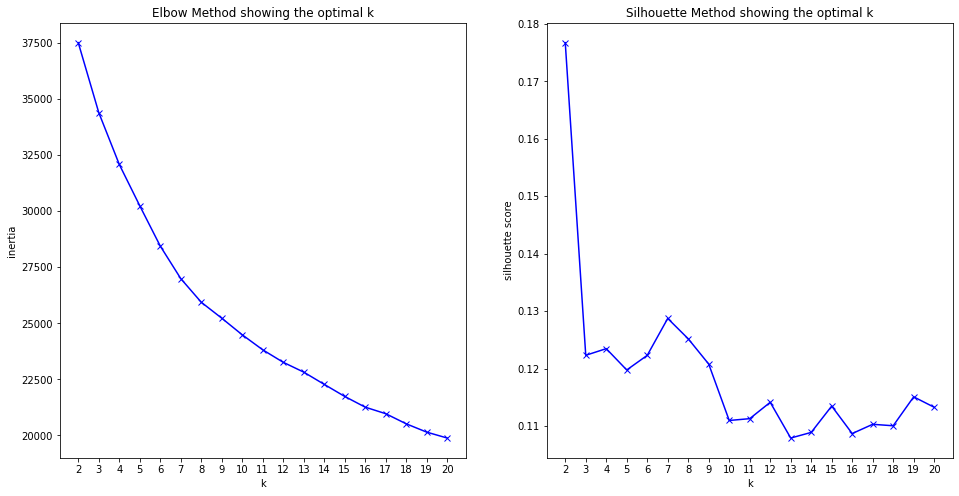

In [54]:
K = range(2, 21)
inertia = []
silhouette = []

for k in K:
    # Train the model
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=0)
                    # , verbose=1)
    kmeans.fit(X_scaled)
    
    # Save the model in a file
    filename = "models/kmeans_" + str(k) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)
    
    # Compute and record the metrics
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))

#Plots
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

There is not really any meaningful elbow. I will use silhouette.  
k = 13

# Load the best model

In [55]:
def load(filename): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!") 


In [56]:
best_clustering = load('models/kmeans_13.pickle')

# Concat clusters

In [57]:
cluster = best_clustering.predict(X_scaled)

In [58]:
cluster

array([ 4,  0, 11, ..., 11, 11,  2], dtype=int32)

In [59]:
full['cluster'] = list(cluster)

In [60]:
full

,Unnamed: 0,Unnamed: 0.1,song,singer,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,hot,cluster
0,0,0,As It Was,Harry Styles,4LRPiXqCikLlN15c3yImP7,0.520,0.731,6.0,-5.338,0.0,0.0557,0.342000,0.001010,0.3110,0.662,173.930,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303.0,4.0,Yes,4
1,1,1,First Class,Jack Harlow,1rDQ4oMwGJI7B4tovsBOxc,0.905,0.563,8.0,-6.135,1.0,0.1020,0.025400,0.000010,0.1130,0.324,106.998,audio_features,1rDQ4oMwGJI7B4tovsBOxc,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948.0,4.0,Yes,0
2,2,2,Wait For U,Future Featuring Drake & Tems,59nOXPmaKlBfGMDeOVGrIK,0.463,0.642,1.0,-4.474,1.0,0.3400,0.314000,0.000000,0.0686,0.339,83.389,audio_features,59nOXPmaKlBfGMDeOVGrIK,spotify:track:59nOXPmaKlBfGMDeOVGrIK,https://api.spotify.com/v1/tracks/59nOXPmaKlBf...,https://api.spotify.com/v1/audio-analysis/59nO...,189893.0,4.0,Yes,11
3,3,3,Late Night Talking,Harry Styles,1qEmFfgcLObUfQm0j1W2CK,0.714,0.728,10.0,-4.595,1.0,0.0468,0.298000,0.000000,0.1060,0.901,114.996,audio_features,1qEmFfgcLObUfQm0j1W2CK,spotify:track:1qEmFfgcLObUfQm0j1W2CK,https://api.spotify.com/v1/tracks/1qEmFfgcLObU...,https://api.spotify.com/v1/audio-analysis/1qEm...,177955.0,4.0,Yes,0
4,4,4,About Damn Time,Lizzo,1PckUlxKqWQs3RlWXVBLw3,0.836,0.743,10.0,-6.305,0.0,0.0656,0.099500,0.000000,0.3350,0.722,108.966,audio_features,1PckUlxKqWQs3RlWXVBLw3,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822.0,4.0,Yes,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4994,4994,Hold Me Darling,Tony Curtis,3AdemeJ7NFWl3vgQokE5hi,0.736,0.394,5.0,-11.066,1.0,0.0587,0.050600,0.000000,0.0684,0.727,154.155,audio_features,3AdemeJ7NFWl3vgQokE5hi,spotify:track:3AdemeJ7NFWl3vgQokE5hi,https://api.spotify.com/v1/tracks/3AdemeJ7NFWl...,https://api.spotify.com/v1/audio-analysis/3Ade...,206920.0,4.0,No,6
4995,4995,4995,Peace And Love,The Itals,2ArsnzjMQj1S7sOwEGkbVC,0.744,0.372,0.0,-16.438,1.0,0.0765,0.205000,0.000060,0.0827,0.864,79.019,audio_features,2ArsnzjMQj1S7sOwEGkbVC,spotify:track:2ArsnzjMQj1S7sOwEGkbVC,https://api.spotify.com/v1/tracks/2ArsnzjMQj1S...,https://api.spotify.com/v1/audio-analysis/2Ars...,235040.0,4.0,No,6
4996,4996,4996,Makin' Plans,Miranda Lambert,4SgbELGcdmMdVtSbpkSG6x,0.441,0.463,10.0,-8.041,1.0,0.0283,0.069700,0.002640,0.1070,0.343,79.611,audio_features,4SgbELGcdmMdVtSbpkSG6x,spotify:track:4SgbELGcdmMdVtSbpkSG6x,https://api.spotify.com/v1/tracks/4SgbELGcdmMd...,https://api.spotify.com/v1/audio-analysis/4Sgb...,230000.0,3.0,No,11
4997,4997,4997,Beneath The Green,Vision of Disorder,2mkiebZRKDqJmOX0lFj3Vx,0.398,0.976,7.0,-4.318,1.0,0.2360,0.011600,0.000034,0.2390,0.266,112.855,audio_features,2mkiebZRKDqJmOX0lFj3Vx,spotify:track:2mkiebZRKDqJmOX0lFj3Vx,https://api.spotify.com/v1/tracks/2mkiebZRKDqJ...,https://api.spotify.com/v1/audio-analysis/2mki...,247640.0,4.0,No,11
